# Solution - ProShares Replication

## HBS Case

### *ProShares Hedge Replication ETF*

**Thanks to Anand Nakhate (anandnakhate@uchicago.edu)**

***

# 1. READING - The ProShares ETF Product

### 1. Alternative ETFs

Describe the two types of investments referenced by this term.

Alternative ETFs refers both to what we own (non‑traditional exposures) and how we earn the return (strategy engineering)
- **Alternative asset classes**: These are asset classes that don't fall into the traditional equity or fixed income categories. They provide exchange-traded access to non-traditional premia (e.g., commodities, currencies, REITs/real estate, high-yield/credit, volatility), with daily liquidity and ‘40-Act’ oversight. ProShares organizes these under Global Fixed Income, Hedge Strategies, Geared, and Inflation & Volatility. 
- **Alternative strategies**: Rules‑based or derivative‑enabled strategies (long/short, replication, inverse/levered, hedged) that target return patterns rather than securities selection (e.g., factor/style replications of hedge‑fund beta, targeting specific risk profiles, trading frequencies, or event-based investing).

### 2. Hedge Funds.

* a. Using just the information in the case, what are two measures by which hedge funds are an attractive investment?

* b. What are the main benefits of investing in hedge funds via an ETF instead of directly?

- a.
  - **Superior long‑run risk‑adjusted profile**: From 1994–2013, HFRI’s volatility was less than half the S&P 500 (usually because of the lack of pricing of these illiquid or niche assets in the Hedge Fund), with average returns <1% below equities, yielding a higher Sharpe ratio. Its drawdowns were also materially smaller (about half of equities in 2008).
  - **Diversification value**: Replacing ~20% of a 60/40’s equity sleeve with HFRI historically kept returns similar while materially reducing portfolio risk.
- b.
  - Access & liquidity (no lockups/gates; intraday trading), lower cost (~95 bps vs 2&20), transparency (daily disclosure), operational simplicity (1099 tax reporting), and less manager-idiosyncratic risk (broad beta vs single-manager alpha risk).
  - Of course, there are drawbacks to investing in the ETF instead of a single fund. Namely, the single fund may deliver excess returns (alpha) via specialized information, market access, skill, etc.

### 3. The Benchmarks

* a. Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their construction and purpose.

* b. How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

* c. In which factor does the MLFM have the largest loading? (See a slide in Exhibit 1.)

* d. What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

- a. 
  - **HFRI**: An index of reported hedge‑fund returns (≈2,000 funds with a certain AUM, equally weighted). Broad, non‑investable, monthly survey returns (broad proxy of hedge fund performance in general). It is the “target” behavior HDG wants to mimic. HFRI itself is simply a survey of hedge funds.
  - **MLFM** (Merrill Lynch Factor Model): A returns‑based style analysis that regresses HFRI on six liquid market factors (S&P 500, Russell 2000, EAFE, EM, EUR/USD, 3‑mo Eurodollar) with rolling 24‑month windows and constraints, to approximate “hedge‑fund beta.” Purpose: statistical replication of HFRI.
  - **MLFM‑ES** (Exchange Series): Makes MLFM investable by swapping non‑tradables for tradables (Eurodollar → U.S. T‑Bills, EUR/USD → ProShares EUO). Built as the index benchmark that HDG can track.
  - **HDG** (ProShares ETF): An ETF that implements MLFM‑ES exposures (with physicals, futures, and index swaps) and may make practical deviations to reduce trading cost/implementation frictions.
- b. MLFM vs HFRI shows ~ 0.90 correlation through 2013. It tracked well overall, with noticeable periods of mis‑tracking (e.g., 2008) and mild lag in 2012–2013.
- c. MLFM has its largest loading in 3-Month T-Bills.
- d.
  - **Backward‑looking fit** (rolling regressions): Style shifts in hedge funds can move faster than a 24‑month window, so the model may lag turning points.
  - **Missing alternative betas**: Six broad equity/FX/rate factors omit credit spreads, carry, volatility, illiquidity, and other risk premia often harvested by hedge funds.
  - **Multicollinearity** among factors (S&P, EAFE, EM, Russell 2000 are highly correlated), which can make weights unstable
  - **Benchmark quality**: HFRI’s self‑reported, smoothed, monthly returns can depress measured volatility/drawdowns versus truly tradable portfolios, raising the bar for any investable replicator.

### 4. The HDG Product

* a. What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

* b. HDG is, by construction, delivering beta for investors. Isn't the point of hedge funds to generate alpha? Then why would HDG be valuable?

* c. The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive. HDG's expense ratio is roughly 1% on total assets. What would their respective net Sharpe Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

- a. HDG tracks MLFM‑ES, an investable version of MLFM. MLFM‑ES tracked the MLFM with ≈99.7% correlation (daily, 2011–2013), and HDG, in turn, tracked MLFM‑ES closely. Tracking error is small versus MLFM‑ES, though not zero.
- b
  - What many investors call "alpha" in broad hedge‑fund composites is often engineered beta (dynamic exposures to equity, rates, FX, etc.). HDG packages that alternative beta cheaply, transparently, and liquidly.
  - Portfolio‑level value comes from:
    - *Diversification* versus 60/40.
    - *Fee drag reduction*: paying ~1% instead of a high fee preserves more of the gross Sharpe.
    - *Implementation convenience*: avoiding lockups, and manager idiosyncratic risk.
  - Cheap, diversified beta can be “alpha‑like” at the portfolio level when compared to expensive, capacity‑constrained alpha sources.
- c. For HDG, we would have $\frac{(10-1)\%}{20\%}=0.45$ and for the hedge fund itself we would have $\frac{(10-2-2)\%}{20\%}=0.30$. Perhaps this difference in fees makes HDG an attractive option, particularly if it is the "hedge fund beta" that is what investors truly value.

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from cmds.hw2_helper import *

pd.set_option('display.float_format', lambda x: f"{x:,.6f}")

# 2.  Analyzing the Data

Use the data found on Canvas, in <b>'proshares analysis data.xlsx'</b>. 

It has monthly data on financial indexes and ETFs from `Aug 2011` through `May 2025`.

In [2]:
xlsx_path = "../data/proshares_analysis_data.xlsx"

data = load_data(xlsx_path)
hedge = data.hedge.copy()   
factors = data.factors.copy()   
other = data.other.copy()   

## 1. 

For the series in the "hedge fund series" tab, report the following summary statistics:
* mean
* volatility
* Sharpe ratio

Annualize these statistics.

In [3]:
hf_cols = ['HFRIFWI Index','MLEIFCTR Index','MLEIFCTX Index','HDG US Equity','QAI US Equity']
hf = hedge[hf_cols].dropna(how='all')

perf_stats = performance_stats(hf, rf=None, periods=12)
display(perf_stats.style.format("{:.1%}").background_gradient(cmap='Blues'))

,mean,vol,sharpe
HFRIFWI Index,5.1%,5.9%,87.2%
MLEIFCTR Index,3.9%,5.5%,69.8%
MLEIFCTX Index,3.7%,5.5%,66.3%
HDG US Equity,2.7%,5.7%,46.8%
QAI US Equity,2.9%,5.0%,57.8%


## 2.

For the series in the "hedge fund series" tab, calculate the following statistics related to tail-risk.
* Skewness
* Excess Kurtosis (in excess of 3)
* VaR (.05) - the fifth quantile of historic returns
* CVaR (.05) - the mean of the returns at or below the fifth quantile
* Maximum drawdown - include the dates of the max/min/recovery within the max drawdown period.

There is no need to annualize any of these statistics.

In [4]:
risk_stats = tail_risk_stats(hf, alpha=0.05)
with pd.option_context('display.float_format', '{:.1%}'.format):
    # Format dates in risk_stats
    for col in risk_stats.columns:
        if pd.api.types.is_datetime64_any_dtype(risk_stats[col]):
            risk_stats[col] = risk_stats[col].dt.strftime('%Y-%m-%d')
    display(risk_stats)

,skewness,excess_kurtosis,VaR_0.05,CVaR_0.05,max_drawdown,dd_peak,dd_trough,dd_recovery
HFRIFWI Index,-94.8%,565.7%,-2.4%,-3.6%,-11.5%,2019-12-31,2020-03-31,2020-08-31
MLEIFCTR Index,-29.0%,163.1%,-2.7%,-3.5%,-12.4%,2021-06-30,2022-09-30,2024-02-29
MLEIFCTX Index,-27.3%,159.0%,-2.7%,-3.5%,-12.4%,2021-06-30,2022-09-30,2024-02-29
HDG US Equity,-27.5%,177.6%,-3.0%,-3.7%,-14.1%,2021-06-30,2022-09-30,2024-07-31
QAI US Equity,-43.4%,144.9%,-1.7%,-3.1%,-13.8%,2021-06-30,2022-09-30,2024-02-29


## 3. 

For the series in the "hedge fund series" tab, run a regression of each against SPY (found in the "merrill factors" tab.) Include an intercept. Report the following regression-based statistics:
* Market Beta
* Treynor Ratio
* Information ratio

Annualize these three statistics as appropriate.

In [5]:
market = factors['SPY US Equity'].rename('SPY')
aligned_hf, aligned_mkt = align_on_index(hf, market.to_frame())
regression_stats = regress_vs_market(aligned_hf, aligned_mkt['SPY'], rf=0.0, periods=12)
display(regression_stats[["beta", "treynor", "ir"]].style.format("{:.1%}").background_gradient(cmap='Blues'))

,beta,treynor,ir
HFRIFWI Index,34.6%,14.8%,5.5%
MLEIFCTR Index,34.2%,11.0%,-44.7%
MLEIFCTX Index,34.1%,10.4%,-52.0%
HDG US Equity,35.0%,7.4%,-87.0%
QAI US Equity,30.1%,9.2%,-61.9%


## 4. 

Discuss the previous statistics, and what they tell us about...

* the differences between SPY and the hedge-fund series?
* which performs better between HDG and QAI.
* whether HDG and the ML series capture the most notable properties of HFRI.

__*(a)*__ *On average, these hedge fund series have around a 30 to 35% exposure to SPY as shown by their respective $\beta^{SPY}$. The Treynor Ratio, which measures the level of returns per unit of market risk (proxied by SPY), ranged from ~0.07 to ~0.15, while the mean return of SPY itself was close to 0.14. This seems to indicate that these hedge fund strategies underperformed even relative to the level of risk that was taken on. Lastly, the information ratio of almost all of these strategies was negative (except HFRI, which is slightly positive), which reflects their negative $\alpha$. In these regressions, $\alpha$ shows the hedge fund returns that could not be explained by the market. It seems that hedge funds have performed poorly over the past few years.*

__*(b)*__ *Between HDG and QAI, there are some notable differences. First, QAI has slightly less exposure to market risk than does HDG, with their difference in betas at ~0.05. As an investor who may be attracted to hedge funds due to their diversification benefits, this difference could be quite meaningful. Secondly, even proportional to the level of market risk, QAI has higher returns.*

__*(c)*__ *Although HDG lags behind both HFRI and the ML series in terms of performance, both it and the ML series generally capture the most notable properties of HFRI. The level of market risk is quite similar to HFRI, which, as discussed in the case, is a driving factor of hedge fund investing. Again, these ETF returns are significantly lower than HFRI, which could be a deterrent to potential investors.*

## 5. 

Report the correlation matrix for these assets.
* Show the correlations as a heat map.
* Which series have the highest and lowest correlations?

(<Figure size 800x800 with 2 Axes>,
 <Axes: title={'center': 'Correlation matrix (full triangle)'}>)

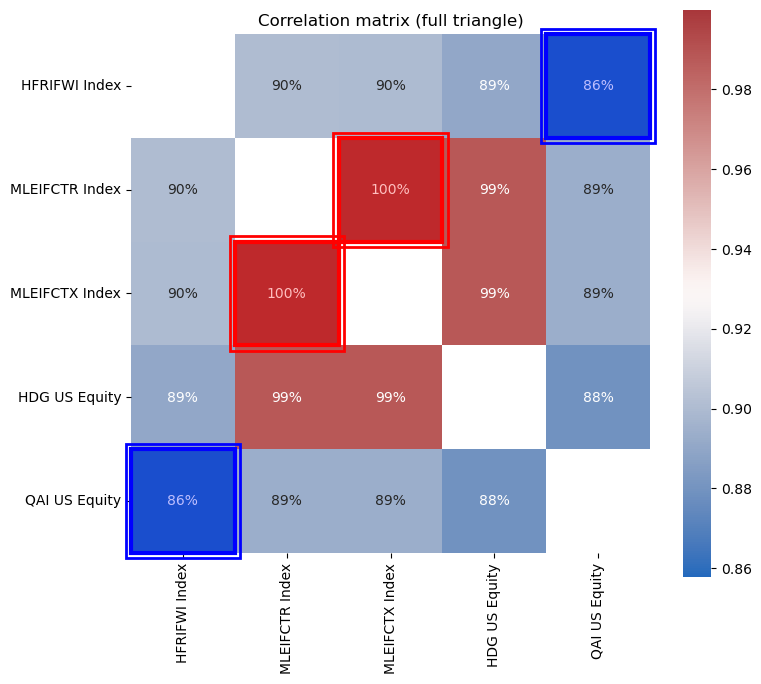

In [31]:
corr_mat = correlation_matrix(hf)
from cmds.plot_tools import plot_triangular_matrix, plot_corr_matrix
plot_corr_matrix(hf)

QAI has the lowest correlations to the other assets, while the ML series has the highest correlations. The HDG does a great job of tracking the MLEIFCTR and MLEIFCTX.

In [7]:
# maxpair = corr_mat.stack().idxmax()
# maxvalue = corr_mat.stack().max()
# minpair = corr_mat.stack().idxmin()
# minvalue = corr_mat.stack().min()

# print(f'The maximum correlation is between {maxpair[0]} and {maxpair[1]}: {round(maxvalue,4)}.')
# print(f'The minimum correlation is between {minpair[0]} and {minpair[1]}: {round(minvalue,4)}.')

## 6.

Replicate HFRI with the six factors listed on the "merrill factors" tab. Include a constant, and run the unrestricted regression,

$$\begin{align}
r^{hfri}_{t} &= \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr}\\[5pt]
\hat{r}^{hfri}_{t} &= \hat{\alpha}^{merr} + x_{t}^{merr}\hat{\beta}^{merr}
\end{align}$$

Note that the second equation is just our notation for the fitted replication.

a. Report the intercept and betas.

b. Are the betas realistic position sizes, or do they require huge long-short positions?

c. Report the R-squared.

d. Report the volatility of $\epsilon^{merr}$, the tracking error.

In [33]:
factor_cols = ['SPY US Equity','IWM US Equity','EFA US Equity','EEM US Equity','EUO US Equity','USGG3M Index']
X = factors[factor_cols].copy()
y = hf['HFRIFWI Index'].copy()

aligned_y, aligned_X = align_on_index(y.to_frame(), X)
aligned_y = aligned_y.iloc[:,0]
ols_full = ols_replication(aligned_y, aligned_X, add_const=True, periods=12)
print("Intercept (alpha):", f"{ols_full.alpha: .6f}")
display(pd.DataFrame(ols_full.betas, columns=['beta']).style.format("{:.1%}").background_gradient(cmap='Greens'))

Intercept (alpha):  0.001149


,beta
SPY US Equity,4.4%
IWM US Equity,14.6%
EFA US Equity,7.4%
EEM US Equity,8.6%
EUO US Equity,3.0%
USGG3M Index,32.5%


In [9]:
print("Position intensity: Sum of absolute betas (ex-alpha):", f"{np.sum(np.abs(ols_full.betas.values)): .3f}")

Position intensity: Sum of absolute betas (ex-alpha):  0.703


Exposures map to ETF friendly, implementable weights (~35% diversified equities, ~32% bills, ~3% FX). Nothing here suggests the model needs extreme or levered long–short positions.

In [10]:
print("c. R-squared:", f"{ols_full.r2: .2f}")

c. R-squared:  0.84


In [11]:
print("d. Tracking Error (annualized):", f"{ols_full.tracking_error_ann: .4f}")

d. Tracking Error (annualized):  0.0233


## 7.

Let's examine the replication out-of-sample (OOS).

Starting with $t = 61$ month of the sample, do the following:

* Use the previous 60 months of data to estimate the regression equation. 
This gives time-t estimates of the regression parameters, $\tilde{\alpha}^{merr}_{t}$ and $\tilde{\beta}^{merr}_{t}$.

* Use the estimated regression parameters, along with the time-t regressor values, $x^{merr}_{t}$, calculate the time-t replication value that is, with respect to the regression estimate, built "out-of-sample" (OOS).

$$\hat{r}^{hfri}_{t} \equiv \tilde{\alpha}^{merr} + (x_{t}^{merr})'\tilde{\beta}^{merr}$$

* Step forward to $t = 62$, and now use $t = 2$ through $t = 61$ for the estimation. Re-run the steps above, and continue this process throughout the data series. Thus, we are running a rolling, 60-month regression for each point-in-time.

How well does the out-of-sample replication perform with respect to the target?

In [12]:
oos = rolling_replication_oos(aligned_y, aligned_X, window=60, add_const=True)
oos = oos.dropna()
common = aligned_y.index.intersection(oos.index)
hfri_common = aligned_y.loc[common]
oos_common = oos.loc[common]
corr_oos = np.corrcoef(hfri_common, oos_common)[0,1]
te_oos = (hfri_common - oos_common).std(ddof=1) * np.sqrt(12)

print("OOS correlation (HFRI vs replication):", f"{corr_oos: .4f}")
print("OOS tracking error (Vol - annualized):", f"{te_oos: .4f}")

OOS correlation (HFRI vs replication):  0.9013
OOS tracking error (Vol - annualized):  0.0275


In [13]:
oos_loss = ((hfri_common - oos_common)**2).sum()
oos_mean = hfri_common.mean()
oos_loss_null = ((hfri_common - oos_mean)**2).sum()
oos_r2 = 1 - oos_loss / oos_loss_null
print(f'The OOS R-Squared of the replication is {round(oos_r2,4)}')

The OOS R-Squared of the replication is 0.8055


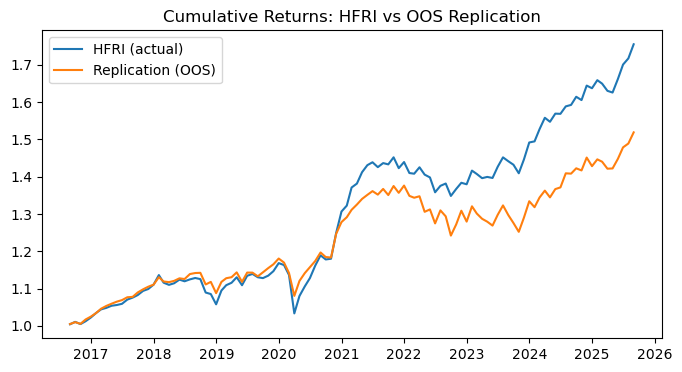

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot((1+hfri_common).cumprod(), label='HFRI (actual)')
ax.plot((1+oos_common).cumprod(), label='Replication (OOS)')
ax.set_title("Cumulative Returns: HFRI vs OOS Replication")
ax.legend()
plt.show()

- As an investable hedge-fund beta proxy, the OOS result is strong, but it does not fully match HFRI’s level.
- Our replication portfolio does a decent job of tracking the index returns, as shown by the charts above and the ~90% correlation between the two. However, it is evident that the replication is lagging behind the cumulative returns of HFRIFWI.

Note: *One important consideration is whether or not we include the intercept in our "replication". On the one hand, it is useful to assess what sort of replication we could create if we had access to the alpha. On the other hand, we know that we can't directly get exposure to the alpha in our replication, so it may also make sense to assess our replication solely based on the betas (which are tradable). These considerations may lead to different choices in fitting the model, as shown below.*

***

# 3. EXTRA - Other Estimations

In [15]:
X_full = data.factors[factor_cols]
y_hfri = data.hedge["HFRIFWI Index"]
y_hfri_a, X_full_a = align_on_index(y_hfri.to_frame(), X_full)
y = y_hfri_a.iloc[:,0]
X = X_full_a

### 1.

In `Section 2`, we estimated the replications using an intercept. Try the full-sample estimation, but this time without an intercept.

$$\begin{align}
r^{hfri}_{t} &= \alpha^{merr} + x_{t}^{merr}\beta^{merr} + \epsilon_{t}^{merr}\\[5pt]
\check{r}^{hfri}_{t} &= \check{\alpha}^{merr} + x_{t}^{merr}\check{\beta}^{merr}
\end{align}$$

Report

* the regression beta. How does it compare to the estimated beta with an intercept, $\hat{\beta}^{merr}$?

* the mean of the fitted value, $\check{r}^{hfri}_{t}$. How does it compare to the mean of the HFRI?

* the correlations of the fitted values, $\check{r}^{hfri}_{t}$ to the HFRI. How does the correlation compare to that of the fitted values with an intercept, $\hat{r}^{hfri}_{t}$

Do you think Merrill and ProShares fit their replicators with an intercept or not?

In [36]:
replication_comparision, betas_with, betas_no = compare_replications_table(y, X, periods=12)
display(replication_comparision.T.style.format("{:.1%}"))
display(betas_with.to_frame("beta_with_const").style.format("{:.1%}"))
display(betas_no.to_frame("beta_no_const").style.format("{:.1%}"))

,with_const,no_const
alpha,0.1%,0.0%
beta_mkt,4.4%,5.5%
r2,84.3%,85.0%
te_ann,2.3%,2.3%
mean_fitted,0.4%,0.4%
mean_actual,0.4%,0.4%
corr,91.8%,91.7%
beta_abs_sum,70.3%,103.5%


,beta_with_const
SPY US Equity,4.4%
IWM US Equity,14.6%
EFA US Equity,7.4%
EEM US Equity,8.6%
EUO US Equity,3.0%
USGG3M Index,32.5%


,beta_no_const
SPY US Equity,5.5%
IWM US Equity,14.3%
EFA US Equity,7.1%
EEM US Equity,8.4%
EUO US Equity,3.2%
USGG3M Index,65.0%


- Excluding the intercept term, we find that our weights to USGG3M change quite drastically. We now require a much larger exposure to USGG3M, however, the rest of our weights are relatively unchanged.
- Dropping the intercept just pushes ${\alpha}$ into cash. With intercept: USGG3M = 0.325; equities ~ 0.35 total, EUO ~ 0.030. Without intercept: USGG3M jumps to 0.650 (+0.325), while equity/FX betas barely move.
- Gross exposure rises from ~0.70 to ~1.03, still all-long (no long–short offsets).
- Without a constant, OLS must fit the target’s unconditional mean inside the factor span. The near-constant T-bill series is the only factor that can act like the intercept, so it absorbs it.

In [37]:
display(replication_comparision[['mean_fitted']].style.format("{:.1%}"))
display(replication_comparision[['mean_actual']].style.format("{:.1%}"))

,mean_fitted
with_const,0.4%
no_const,0.4%


,mean_actual
with_const,0.4%
no_const,0.4%


- With intercept, the fitted mean exactly equals HFRI's mean because OLS with a constant forces residuals to have zero mean, so the fitted series matches the target’s sample mean.
- Without intercept, the fitted mean undershoots HFRI’s mean. With no constant, the model must span the level using factor means only. They don’t fully span HFRI’s unconditional mean, so the fit comes in low.

Note: *We can trade the factors, but not the alpha.*

In [38]:
display(replication_comparision[['corr']].style.format("{:.1%}"))

,corr
with_const,91.8%
no_const,91.7%


- Correlation is essentially unchanged when you drop the intercept because Pearson correlation de-means both series. So an intercept mostly affects the level of the fit, not its co-movement with HFRI. 
- Dropping the intercept just shifts that level into the T-bill sleeve. The covariance structure, and thus correlation, barely moves.

*The Merrill Lynch Factor Model is a standard returns-based regression. Including a constant makes residuals mean-zero and matches the target’s sample mean. When we move to an investable index (MLFM-ES) and the ETF (HDG), the intercept can’t be held directly, so it’s operationalized as a T-bill sleeve.*

*From the case study, we know they have a large position in US Treasury Bills. This is more aligned with the no-intercept model, which has a positive beta of ~0.6. In addition, we've found that we barely gain any correlation by including the intercept, but we sacrifice a bit of mean return. Conceptually, it makes sense that if we want to replicate the index with the purpose of long-term investments, we likely want to replicate the mean as well as the variation. The intercept ensures we are matching the variation in the factors, where we would like to match the overall level.*

### 2.

Merrill constrains the weights of each asset in its replication regression of HFRI. Try constraining your weights by re-doing 2.6.

* Use Non-Negative Least Squares (NNLS) instead of OLS.
* Go further by using a Generalized Linear Model to put separate interval constraints on each beta, rather than simply constraining them to be non-negative.

#### Hints
* Try using LinearRegression in scikit-learn with the parameter `positive=True`. 
* Try using GLM in statsmodels.

In [39]:
nn = nnls_report(y, X, periods=12, intercept=True)
display(pd.DataFrame(nn["betas"], columns=["beta_nnls"]).style.format("{:.1%}"))
print(f"Correlation: {nn['corr']:.6f}") 
print(f"R-squared: {nn['r2']:.4f}")
print(f"Tracking Error: {nn['tracking_error_ann']:.4f}")

,beta_nnls
intercept,0.1%
SPY US Equity,4.4%
IWM US Equity,14.6%
EFA US Equity,7.4%
EEM US Equity,8.6%
EUO US Equity,3.0%
USGG3M Index,32.5%


Correlation: 0.917984
R-squared: 0.8427
Tracking Error: 0.0233


In [40]:
lower = np.array([-1.0,-0.3,-1.0,0.0,-1.0,0.0])
upper = np.array([ 1.0, 1.0, 1.0,1.0, 1.0,2.0])

bnd = bounded_ls_report(y, X, lower, upper, periods=12, intercept=True)
display(pd.DataFrame(bnd["betas"], columns=["beta_bounded"]).style.format("{:.1%}"))
print(f"Correlation: {bnd['corr']:.6f}") 
print(f"R-squared: {bnd['r2']:.4f}")
print(f"Tracking Error: {bnd['tracking_error_ann']:.4f}")

,beta_bounded
intercept,0.1%
SPY US Equity,4.4%
IWM US Equity,14.6%
EFA US Equity,7.4%
EEM US Equity,8.6%
EUO US Equity,3.0%
USGG3M Index,32.5%


Correlation: 0.917984
R-squared: 0.8427
Tracking Error: 0.0233


In [41]:
qp = constrained_sum_replication(y, X, lower, upper, include=["SPY US Equity","IWM US Equity","EFA US Equity","EEM US Equity","EUO US Equity"], lsum=-1.0, usum=1.0, periods=12)
display(pd.DataFrame(qp.betas, columns=["beta_qp"]).style.format("{:.1%}"))
print(f"{qp.r2:.4f}", f"{qp.tracking_error_ann:.4f}")
print(f"Correlation: {bnd['corr']:.6f}") 
print(f"R-squared: {qp.r2:.4f}")
print(f"Tracking Error: {qp.tracking_error_ann:.4f}")

,beta_qp
SPY US Equity,7.6%
IWM US Equity,13.2%
EFA US Equity,6.8%
EEM US Equity,8.6%
EUO US Equity,3.5%
USGG3M Index,0.9%


0.8404 0.0235
Correlation: 0.917984
R-squared: 0.8404
Tracking Error: 0.0235


# 4. EXTRA - Other Decompositions

### 1. 

Let's decompose a few other targets to see if they behave as their name suggests.

* Regress HEFA on the same style factors used to decompose HFRI. Does HEFA appear to be a currency-hedged version of EFA?

* Decompose TRVCI with the same style factors used to decompose HFRI. The TRVCI Index tracks venture capital funds--in terms of our styles, what best describes venture capital?

* TAIL is an ETF that tracks SPY, but that also buys put options to protect against market downturns. Calculate the statistics in questions 2.1-2.3 for TAIL. Does it seem to behave as indicated by this description? That is, does it have high correlation to SPY while delivering lower tail risk?

In [42]:
X_full = data.factors[factor_cols]
hefa = data.other["HEFA US Equity"]
hefa_a, X_hefa = align_on_index(hefa.to_frame(), X_full)

res_hefa = ols_replication(hefa_a.iloc[:,0], X_hefa, add_const=True, periods=12)
display(pd.DataFrame(res_hefa.betas, columns=["beta"]).style.format("{:.1%}"))
print(f"alpha: {res_hefa.alpha:.6f}") 
print(f"R-squared: {res_hefa.r2:.4f}")
print(f"Tracking Error: {res_hefa.tracking_error_ann:.4f}")

,beta
SPY US Equity,6.5%
IWM US Equity,-1.3%
EFA US Equity,90.6%
EEM US Equity,-3.9%
EUO US Equity,34.6%
USGG3M Index,7.0%


alpha: 0.000754
R-squared: 0.9618
Tracking Error: 0.0235


*Yes, it does appear that it could be a currency-hedged version of EFA, as it clearly has a high beta to EFA. This implies that they have quite similar risks, with the difference potentially coming from currency hedges. We also note the very high R-squared value, which indicates a very strong fit.*

In [43]:
trv = data.other["TRVCI Index"]
trv_a, X_trv = align_on_index(trv.to_frame(), X_full)

res_trv = ols_replication(trv_a.iloc[:,0], X_trv, add_const=True, periods=12)
display(pd.DataFrame(res_trv.betas, columns=["beta"]).style.format("{:.1%}"))
print(f"alpha: {res_trv.alpha:.6f}") 
print(f"R-squared: {res_trv.r2:.4f}")
print(f"Tracking Error: {res_trv.tracking_error_ann:.4f}")

,beta
SPY US Equity,199.0%
IWM US Equity,-22.0%
EFA US Equity,-13.5%
EEM US Equity,-9.7%
EUO US Equity,-8.3%
USGG3M Index,68.2%


alpha: -0.001894
R-squared: 0.7125
Tracking Error: 0.1429


*Our factor betas here imply that venture capital returns are best described through US large-cap equities (SPY). In particular, we find a very high beta, meaning venture capital might appear to be similar to a levered equities investing style.*

In [51]:
tail = data.other["TAIL US Equity"]
spy = data.factors["SPY US Equity"]
tail_a, spy_a = align_on_index(tail.to_frame(), spy.to_frame())

display(performance_stats(pd.concat([tail_a, spy_a], axis=1), rf=0.0, periods=12).style.format("{:.1%}"))
display(tail_risk_stats(pd.concat([tail_a, spy_a]), alpha=0.05).style.format({
    'skewness': '{:.1%}',
    'excess_kurtosis': '{:.1%}', 
    'VaR_0.05': '{:.1%}',
    'CVaR_0.05': '{:.1%}',
    'max_drawdown': '{:.1%}'
}))
display(regress_vs_market(tail_a, spy_a.iloc[:,0], rf=0.0, periods=12).T.style.format("{:.1%}"))

,mean,vol,sharpe
TAIL US Equity,-6.4%,11.4%,-56.3%
SPY US Equity,14.5%,14.3%,100.9%


,skewness,excess_kurtosis,VaR_0.05,CVaR_0.05,max_drawdown,dd_peak,dd_trough,dd_recovery
TAIL US Equity,106.0%,303.3%,-4.6%,-6.3%,-49.5%,2017-05-31 00:00:00,2025-01-31 00:00:00,NaT
SPY US Equity,-41.3%,70.4%,-6.3%,-8.4%,-23.9%,2021-12-31 00:00:00,2022-09-30 00:00:00,2023-12-31 00:00:00


,TAIL US Equity
alpha,0.1%
beta,-49.5%
r2,48.5%
treynor,13.0%
ir,13.5%


*TAIL does reduce downside tail risk, but it doesn’t closely track SPY. It acts like a negatively correlated insurance financed by ongoing losses. We can use it as a small portfolio hedge overlay, not a standalone equity substitute, and review it by conditional (SPY down) performance, not unconditional Sharpe or max drawdown.*

### 2. 

The ProShares case introduces Levered ETFs. ProShares made much of its name originally through levered, or "geared" ETFs.

Explain conceptually why Levered ETFs may track their index well for a given day but diverge over time. How is this exacerbated in volatile periods like 2008?

*Because they have to continually re-lever in order to track the index at 3x. This means that they have a decay over time and the expected return of holding these ETF to infinity is -100%. As an example:*

*Day 1: SPY is at 100, and closes at 110 (10% up). The 3x ETF is at 100, and closes at 130 (30% up). Day 2: SPY is at 110, and closes at 100 (-9.1% down). The 3x ETF is at 130, and closes at 94.51 (-27.3% down).*

*So, even though SPY is back to where it started, the 3x ETF is down 5.49%. This is because it has to re-lever every day, and so it is buying high and selling low. For example, during the financial crisis when there were many large movements down, we would expect these ETFs to lose a lot of value due to continually having to re-lever. This is also why they have high management fees (UPRO has 0.91% management fee, compared to 0.09% for SPY, or 0.03% for VOO).*

### 3.

Analyze SPXU and UPRO relative to SPY.
- SPXU is ProShares -3x SPX ETF.
- UPRO is ProShres +3x SPX ETF.

Questions:
* Analyze them with the statistics from 2.1-2.3. 

* Do these two ETFs seem to live up to their names?

* Plot the cumulative returns of both these ETFs along with SPY.

* What do you conclude about levered ETFs?

In [52]:
cols = ["SPXU US Equity","UPRO US Equity"]
df = pd.concat([data.other[cols], data.factors["SPY US Equity"]], axis=1).dropna()

summary = performance_stats(pd.concat([df[cols], spy], axis=1), rf=0, periods=12)
display(summary.style.format("{:.1%}"))

,mean,vol,sharpe
SPXU US Equity,-44.4%,39.7%,-111.8%
UPRO US Equity,36.3%,44.5%,81.6%
SPY US Equity,14.5%,14.3%,100.9%


In [55]:
tails = tail_risk_stats(pd.concat([df[cols], spy], axis=1), alpha=0.05)
display(tails.style.format({
    "skewness": "{:.1%}",
    "excess_kurtosis": "{:.1%}", 
    "VaR_0.05": "{:.1%}",
    "CVaR_0.05": "{:.1%}",
    "max_drawdown": "{:.1%}",
    "dd_peak": lambda x: x.strftime("%Y-%m-%d") if pd.notna(x) else "",
    "dd_trough": lambda x: x.strftime("%Y-%m-%d") if pd.notna(x) else "",
    "dd_recovery": lambda x: x.strftime("%Y-%m-%d") if pd.notna(x) else ""
}))

,skewness,excess_kurtosis,VaR_0.05,CVaR_0.05,max_drawdown,dd_peak,dd_trough,dd_recovery
SPXU US Equity,59.4%,84.3%,-18.9%,-25.2%,-100.0%,2011-09-30,2025-09-30,
UPRO US Equity,-45.4%,121.4%,-19.9%,-26.4%,-62.7%,2021-12-31,2022-09-30,2024-06-30
SPY US Equity,-41.3%,70.4%,-6.3%,-8.4%,-23.9%,2021-12-31,2022-09-30,2023-12-31


In [57]:
regs = regress_vs_market(df[cols], spy, rf=0, periods=12)
display(regs.style.format("{:.1%}"))

,alpha,beta,r2,treynor,ir
SPXU US Equity,-0.5%,-264.5%,91.2%,16.8%,-51.8%
UPRO US Equity,-0.7%,309.0%,99.2%,11.7%,-214.5%


Yes, they live up to their names for daily exposure, as betas are close to ±3 and very high R² confirm that the products deliver ~3x daily exposure to SPY.

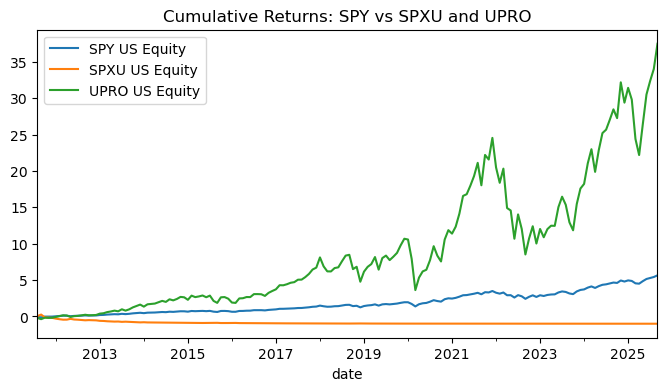

In [28]:
cum = cumulative_returns_panel(df[["SPY US Equity"] + cols])
fig, ax = plt.subplots(figsize=(8,4))
cum.plot(ax=ax)
ax.set_title("Cumulative Returns: SPY vs SPXU and UPRO")
plt.show()

They are tactical instruments, not buy-and-hold core. We can expect ~3x daily moves in returns, volatility and tail risk, and negative alpha over time from fees and variance/compounding. We can use it for short-horizon views or hedges. Technically, they seek to do so for daily returns, which could be one reason it is not exactly 3x for monthly returns. Note that UPRO doesn't quite reach 3x, and this could be a result of the decay present in these levered ETFs.

***